<a href="https://colab.research.google.com/github/ravillanuevar/FacesDetectionComparison/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESULTADOS PARA: images (3).jpg
MTCNN:    0.1657 segundos - 2 caras detectadas
DLib:     0.0898 segundos - 2 caras detectadas
OpenCV DNN: 0.0750 segundos - 2 caras detectadas
Haar:     0.0426 segundos - 2 caras detectadas


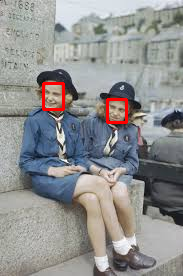

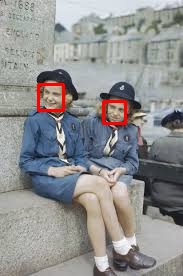

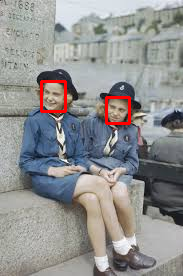

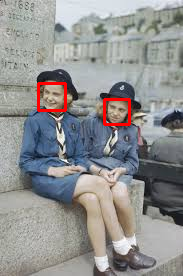

RESULTADOS PARA: images (6).jpg
MTCNN:    0.1805 segundos - 2 caras detectadas
DLib:     0.1016 segundos - 1 caras detectadas
OpenCV DNN: 0.0497 segundos - 1 caras detectadas
Haar:     0.0401 segundos - 1 caras detectadas


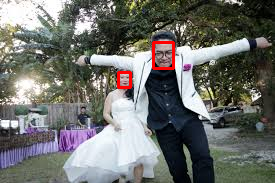

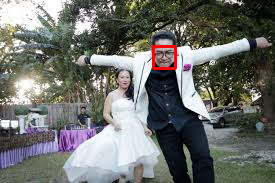

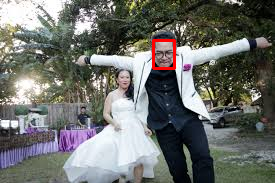

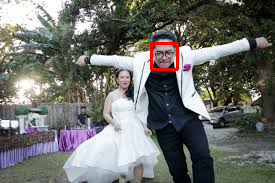

RESULTADOS PARA: images (7).jpg
MTCNN:    0.1979 segundos - 2 caras detectadas
DLib:     0.0898 segundos - 1 caras detectadas
OpenCV DNN: 0.0489 segundos - 0 caras detectadas
Haar:     0.0328 segundos - 1 caras detectadas


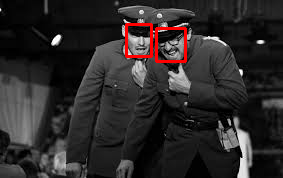

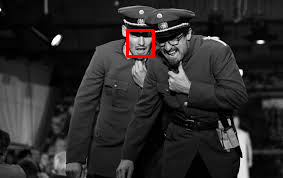

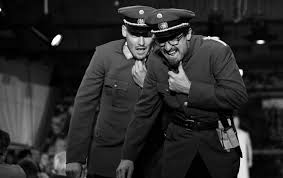

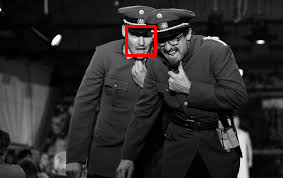

RESULTADOS PARA: images.jpg
MTCNN:    0.1876 segundos - 1 caras detectadas
DLib:     0.0904 segundos - 1 caras detectadas
OpenCV DNN: 0.0466 segundos - 1 caras detectadas
Haar:     0.0369 segundos - 1 caras detectadas


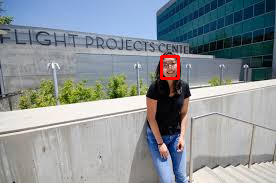

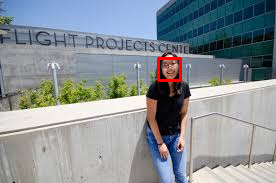

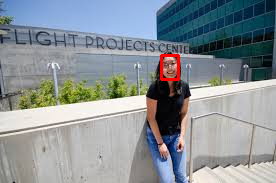

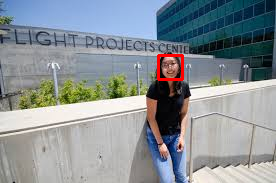

RESULTADOS PARA: images (8).jpg
MTCNN:    0.2744 segundos - 6 caras detectadas
DLib:     0.0925 segundos - 5 caras detectadas
OpenCV DNN: 0.0486 segundos - 6 caras detectadas
Haar:     0.0410 segundos - 5 caras detectadas


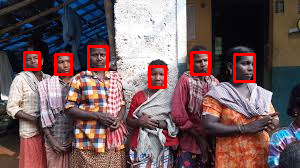

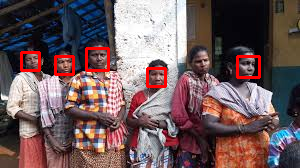

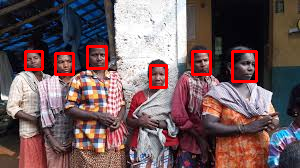

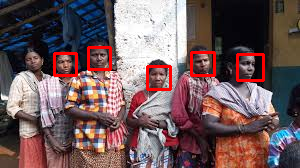

RESULTADOS PARA: download (1).jpg
MTCNN:    0.2339 segundos - 3 caras detectadas
DLib:     0.0936 segundos - 2 caras detectadas
OpenCV DNN: 0.0476 segundos - 3 caras detectadas
Haar:     0.0352 segundos - 1 caras detectadas


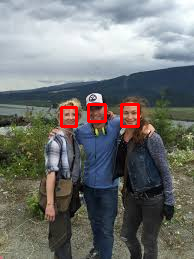

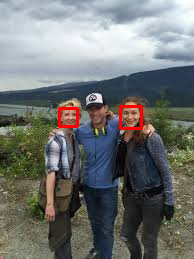

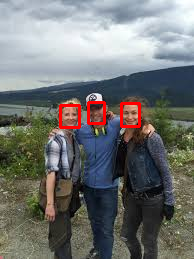

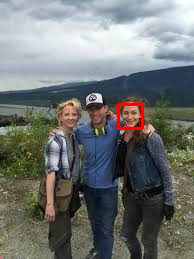

RESULTADOS PARA: images (10).jpg
MTCNN:    0.2595 segundos - 3 caras detectadas
DLib:     0.0945 segundos - 1 caras detectadas
OpenCV DNN: 0.0479 segundos - 3 caras detectadas
Haar:     0.0410 segundos - 1 caras detectadas


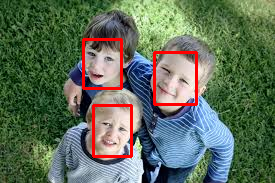

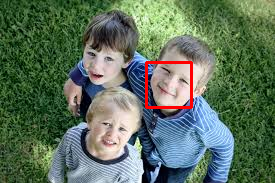

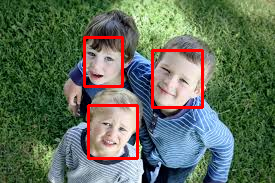

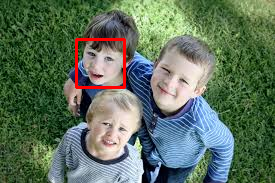

RESULTADOS PARA: images (13).jpg
MTCNN:    0.2378 segundos - 2 caras detectadas
DLib:     0.0995 segundos - 2 caras detectadas
OpenCV DNN: 0.0480 segundos - 2 caras detectadas
Haar:     0.0367 segundos - 1 caras detectadas


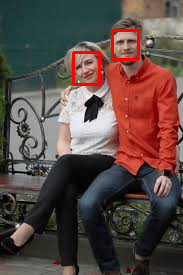

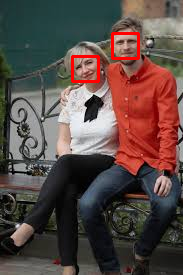

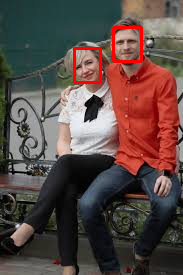

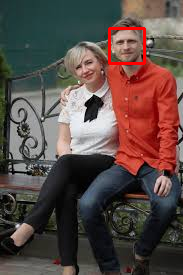

RESULTADOS PARA: images (12).jpg
MTCNN:    0.2859 segundos - 3 caras detectadas
DLib:     0.1046 segundos - 3 caras detectadas
OpenCV DNN: 0.0478 segundos - 3 caras detectadas
Haar:     0.0464 segundos - 2 caras detectadas


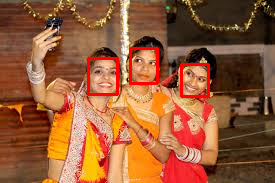

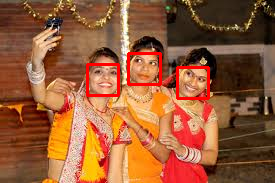

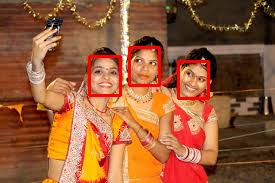

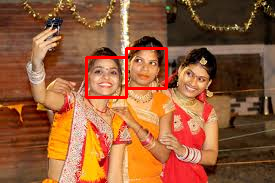

RESULTADOS PARA: images (2).jpg
MTCNN:    0.2473 segundos - 1 caras detectadas
DLib:     0.1277 segundos - 1 caras detectadas
OpenCV DNN: 0.0465 segundos - 1 caras detectadas
Haar:     0.0337 segundos - 1 caras detectadas


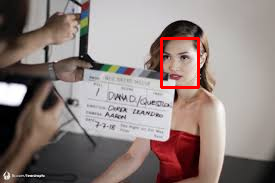

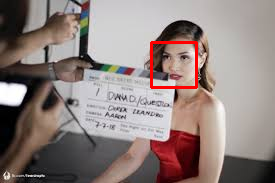

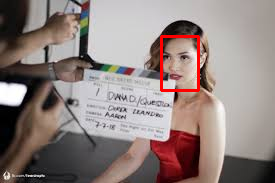

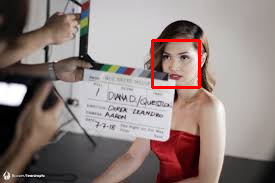

RESULTADOS PARA: images (11).jpg
MTCNN:    0.2558 segundos - 2 caras detectadas
DLib:     0.1362 segundos - 2 caras detectadas
OpenCV DNN: 0.0622 segundos - 2 caras detectadas
Haar:     0.0329 segundos - 3 caras detectadas


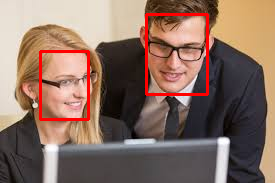

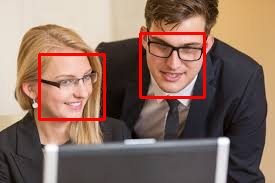

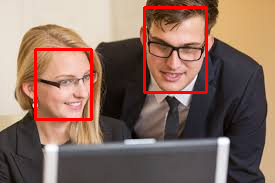

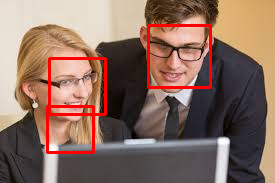

RESULTADOS PARA: images (9).jpg
MTCNN:    0.2832 segundos - 3 caras detectadas
DLib:     0.1368 segundos - 3 caras detectadas
OpenCV DNN: 0.0635 segundos - 3 caras detectadas
Haar:     0.0442 segundos - 2 caras detectadas


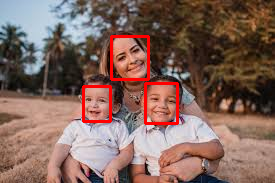

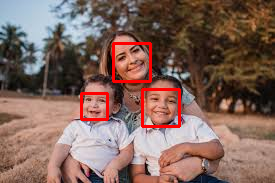

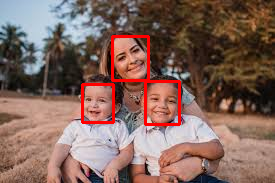

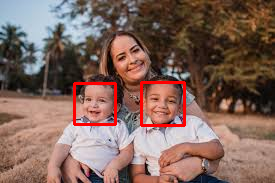

In [24]:
"""
Created on 04.05.2022
Modified on 01.03.2025
by @author: Paideia
send the the comparison and improvements of algorithms to the Profesor´s mail
manuel.quispe.t@uni.edu.pe
2025-II Distributed Computer Vision
"""

from mtcnn.mtcnn import MTCNN
import cv2
import dlib
import numpy as np
import os
import time
from google.colab.patches import cv2_imshow

detector1 = MTCNN()#Multi-task Cascaded CNN-Redes neuronales convolucionales
detector2 = dlib.get_frontal_face_detector()#HOG (Histogram of Oriented Gradients) + SVM
modelFile = "/content/face_detection/models/res10_300x300_ssd_iter_140000.caffemodel"#OpenCV DNN con modelo Caffe-SSD (Single Shot MultiBox Detector)
configFile = "/content/face_detection/models/deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

classifier2 = cv2.CascadeClassifier('/content/face_detection/models/haarcascade_frontalface2.xml')#Características de Haar
images = os.listdir('/content/face_detection/faces')
# os.makedirs('faces/dlib')
# os.makedirs('faces/mtcnn')
# os.makedirs('faces/dnn')
# os.makedirs('faces/haar')

for image in images:
    img = cv2.imread(os.path.join('/content/face_detection/faces', image))
    # img = cv2.resize(img, None, fx=2, fy=2)
    height, width = img.shape[:2]
    img1 = img.copy()# Para Dlib
    img2 = img.copy()# Para DNN
    img3 = img.copy()# Para Haar
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# Para Dlib y Haar
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)# Para MTCNN

    tiempos = []
    caras_detectadas = []
    inicio_mtcnn = time.time()
    # detect faces in the image
    faces1 = detector1.detect_faces(img_rgb)#MTCNN
    fin_mtcnn = time.time()
    tiempo_mtcnn = fin_mtcnn - inicio_mtcnn
    tiempos.append(tiempo_mtcnn)
    caras_detectadas.append(len(faces1))


    inicio_dlib = time.time()
    faces2 = detector2(gray, 2)#Dlib
    fin_dlib = time.time()
    tiempo_dlib = fin_dlib - inicio_dlib
    tiempos.append(tiempo_dlib)
    caras_detectadas.append(len(faces2))


    #OpenCV DNN
    inicio_dnn = time.time()
    #Preparar blob para DNN
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)),
                                 1.0, (300, 300), (104.0, 117.0, 123.0))

    net.setInput(blob)
    faces3 = net.forward()
    fin_dnn = time.time()
    tiempo_dnn = fin_dnn - inicio_dnn
    tiempos.append(tiempo_dnn)

    caras_dnn = 0
    for i in range (faces3.shape[2]):
      confidence = faces3[0, 0, i, 2]
      if confidence > 0.5:
        caras_dnn += 1
    caras_detectadas.append(caras_dnn)



    inicio_haar = time.time()
    #Haar Cascades
    faces4 = classifier2.detectMultiScale(img)
    fin_haar = time.time()
    tiempo_haar = fin_haar - inicio_haar
    tiempos.append(tiempo_haar)
    caras_detectadas.append(len(faces4))


    print(f"RESULTADOS PARA: {image}")
    print(f"MTCNN:    {tiempo_mtcnn:.4f} segundos - {len(faces1)} caras detectadas")
    print(f"DLib:     {tiempo_dlib:.4f} segundos - {len(faces2)} caras detectadas")
    print(f"OpenCV DNN: {tiempo_dnn:.4f} segundos - {caras_dnn} caras detectadas")
    print(f"Haar:     {tiempo_haar:.4f} segundos - {len(faces4)} caras detectadas")

    #MTCNN
    for result in faces1:

      # MTCNN - retorna diccionario con 'box'
        x, y, w, h = result['box']
        x1, y1 = x + w, y + h
        cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
    #DLIB
    for result in faces2:
      # Dlib - retorna objetos rectangle
        x = result.left()
        y = result.top()
        x1 = result.right()
        y1 = result.bottom()
        cv2.rectangle(img1, (x, y), (x1, y1), (0, 0, 255), 2)


    #OPENCV DNN
    for i in range(faces3.shape[2]):
        confidence = faces3[0, 0, i, 2]
        if confidence > 0.5:
          # DNN - requiere procesamiento de coordenadas
            box = faces3[0, 0, i, 3:7] * np.array([width, height, width, height])
            (x, y, x1, y1) = box.astype("int")
            cv2.rectangle(img2, (x, y), (x1, y1), (0, 0, 255), 2)

    #HAAR
    for result in faces4:
      # Haar - retorna (x, y, w, h)
        x, y, w, h = result
        x1, y1 = x + w, y + h
        cv2.rectangle(img3, (x, y), (x1, y1), (0, 0, 255), 2)

    # cv2.imwrite(os.path.join('faces', 'mtcnn', image), img)
    # cv2.imwrite(os.path.join('faces', 'dlib', image), img1)
    # cv2.imwrite(os.path.join('faces', 'dnn', image), img2)
    # cv2.imwrite(os.path.join('faces', 'haar', image), img3)

    cv2_imshow(img) # Resultados MTCNN
    cv2_imshow(img1)# Resultados Dlib
    cv2_imshow(img2)# Resultados DNN
    cv2_imshow(img3) # Resultados Haar
    cv2.waitKey(0)
    cv2.destroyAllWindows()